In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier # model download
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Load Data


In [2]:
train_df = pd.read_csv("/content/panic_disorder_dataset_training.csv")
test_df = pd.read_csv("/content/panic_disorder_dataset_testing.csv")
IDtest = test_df["Participant ID"] # Unique for each person

In [3]:
train_df = train_df.copy()
train_df.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


# Check Data

In [4]:
print("Training set", train_df.shape)
print("Testing set", test_df.shape)

Training set (100000, 17)
Testing set (20000, 17)


## NO NULL VALUES

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

# Exploratory Data Analysis (EDA)

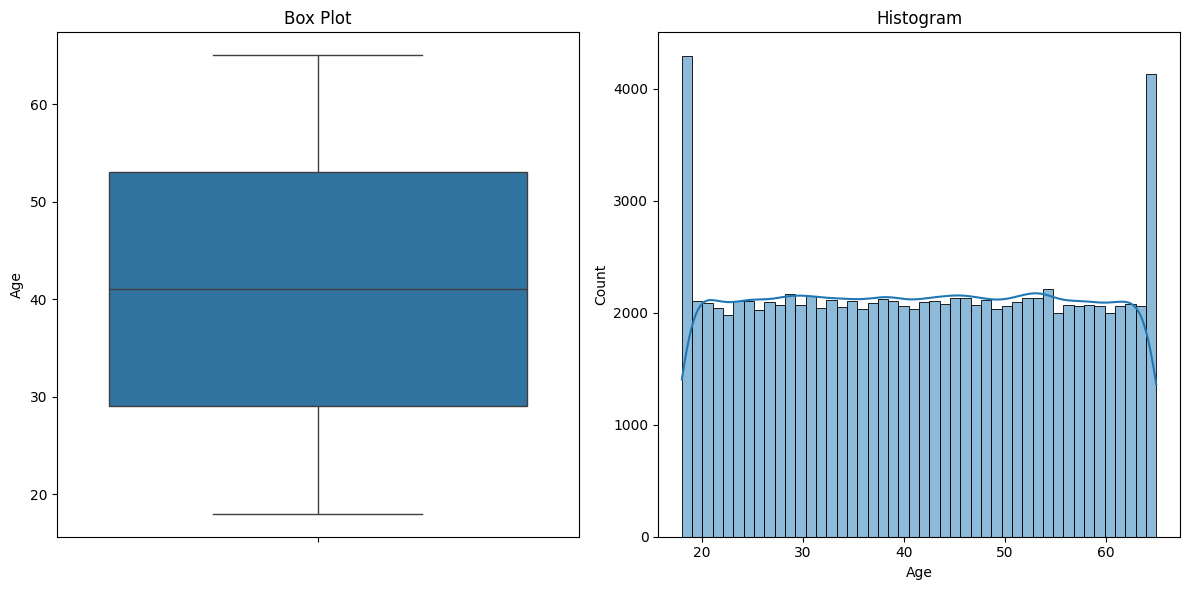

In [11]:
feature = "Age"

# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df[feature])
#sns.boxplot(x=train_df[feature])
plt.title('Box Plot')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x=feature, kde=True)
plt.title('Histogram')

plt.tight_layout()
plt.show()

<ipython-input-13-a3727026b2f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=selected_df, x=feature, palette='Paired')
<ipython-input-13-a3727026b2f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=selected_df, x=feature, palette='Paired')
<ipython-input-13-a3727026b2f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=selected_df, x=feature, palette='Paired')
<ipython-input-13-a3727026b2f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

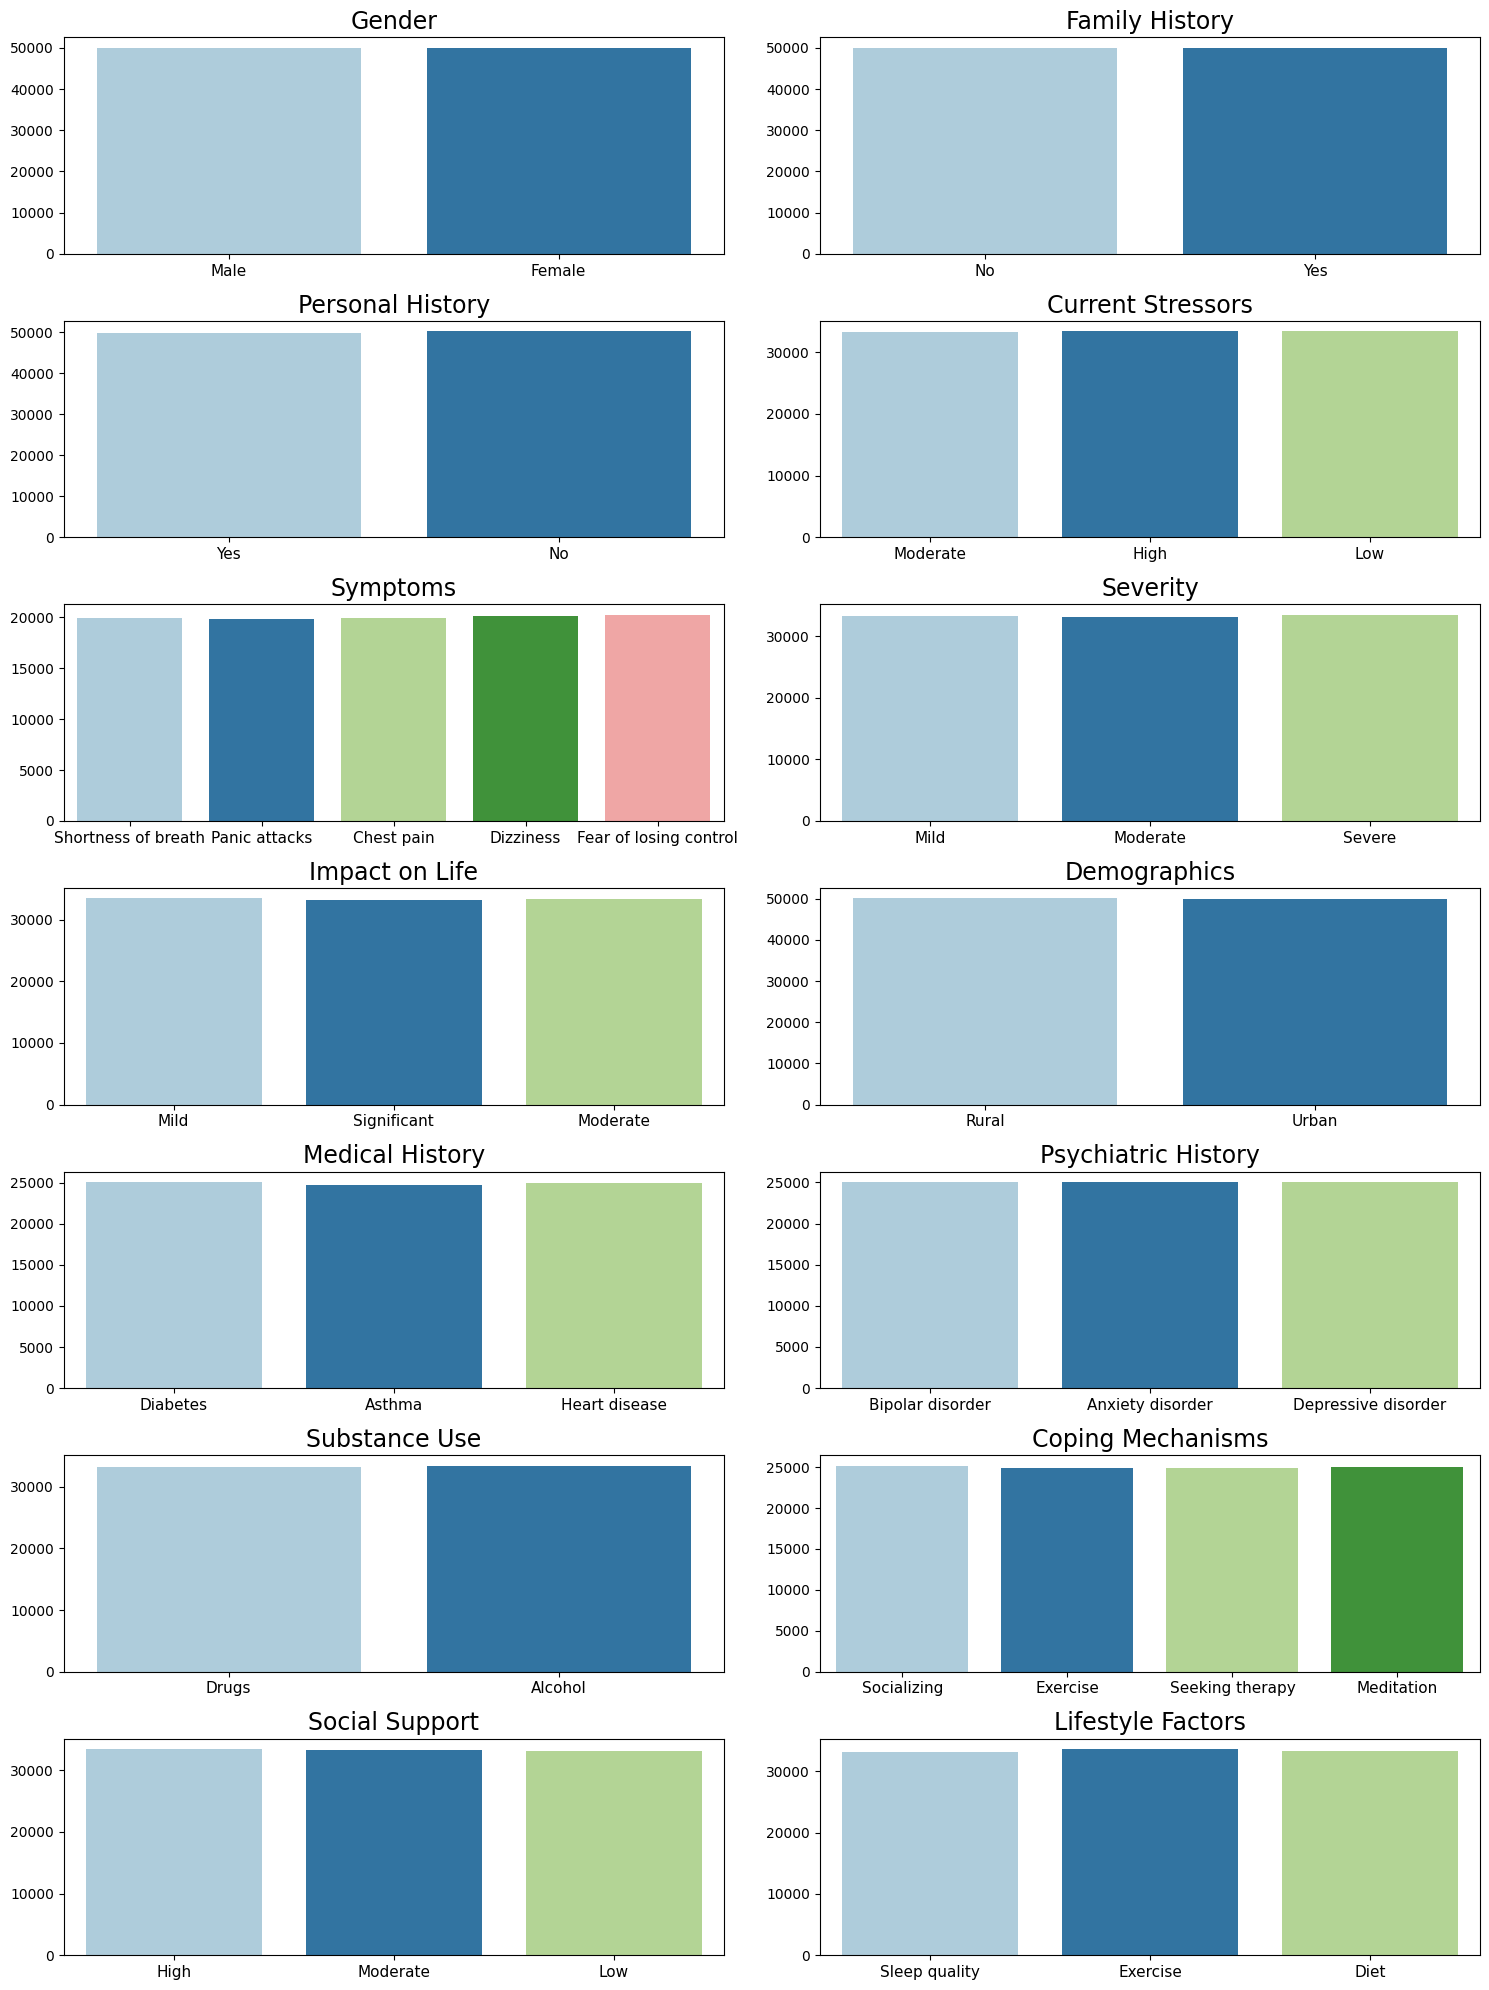

In [13]:
# Bar plots of ALL feautres except 'Participate ID', 'Age', 'Panic Disorder Diagnosis' columns

selected_columns = [col for col in train_df.columns if col not in ['Participant ID', 'Age', 'Panic Disorder Diagnosis']]
selected_df = train_df[selected_columns]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(selected_df.columns):
    plt.subplot(7, 2, i+1)
    sns.countplot(data=selected_df, x=feature, palette='Paired')
    plt.xticks(fontsize=11)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(feature, fontsize=17)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variab

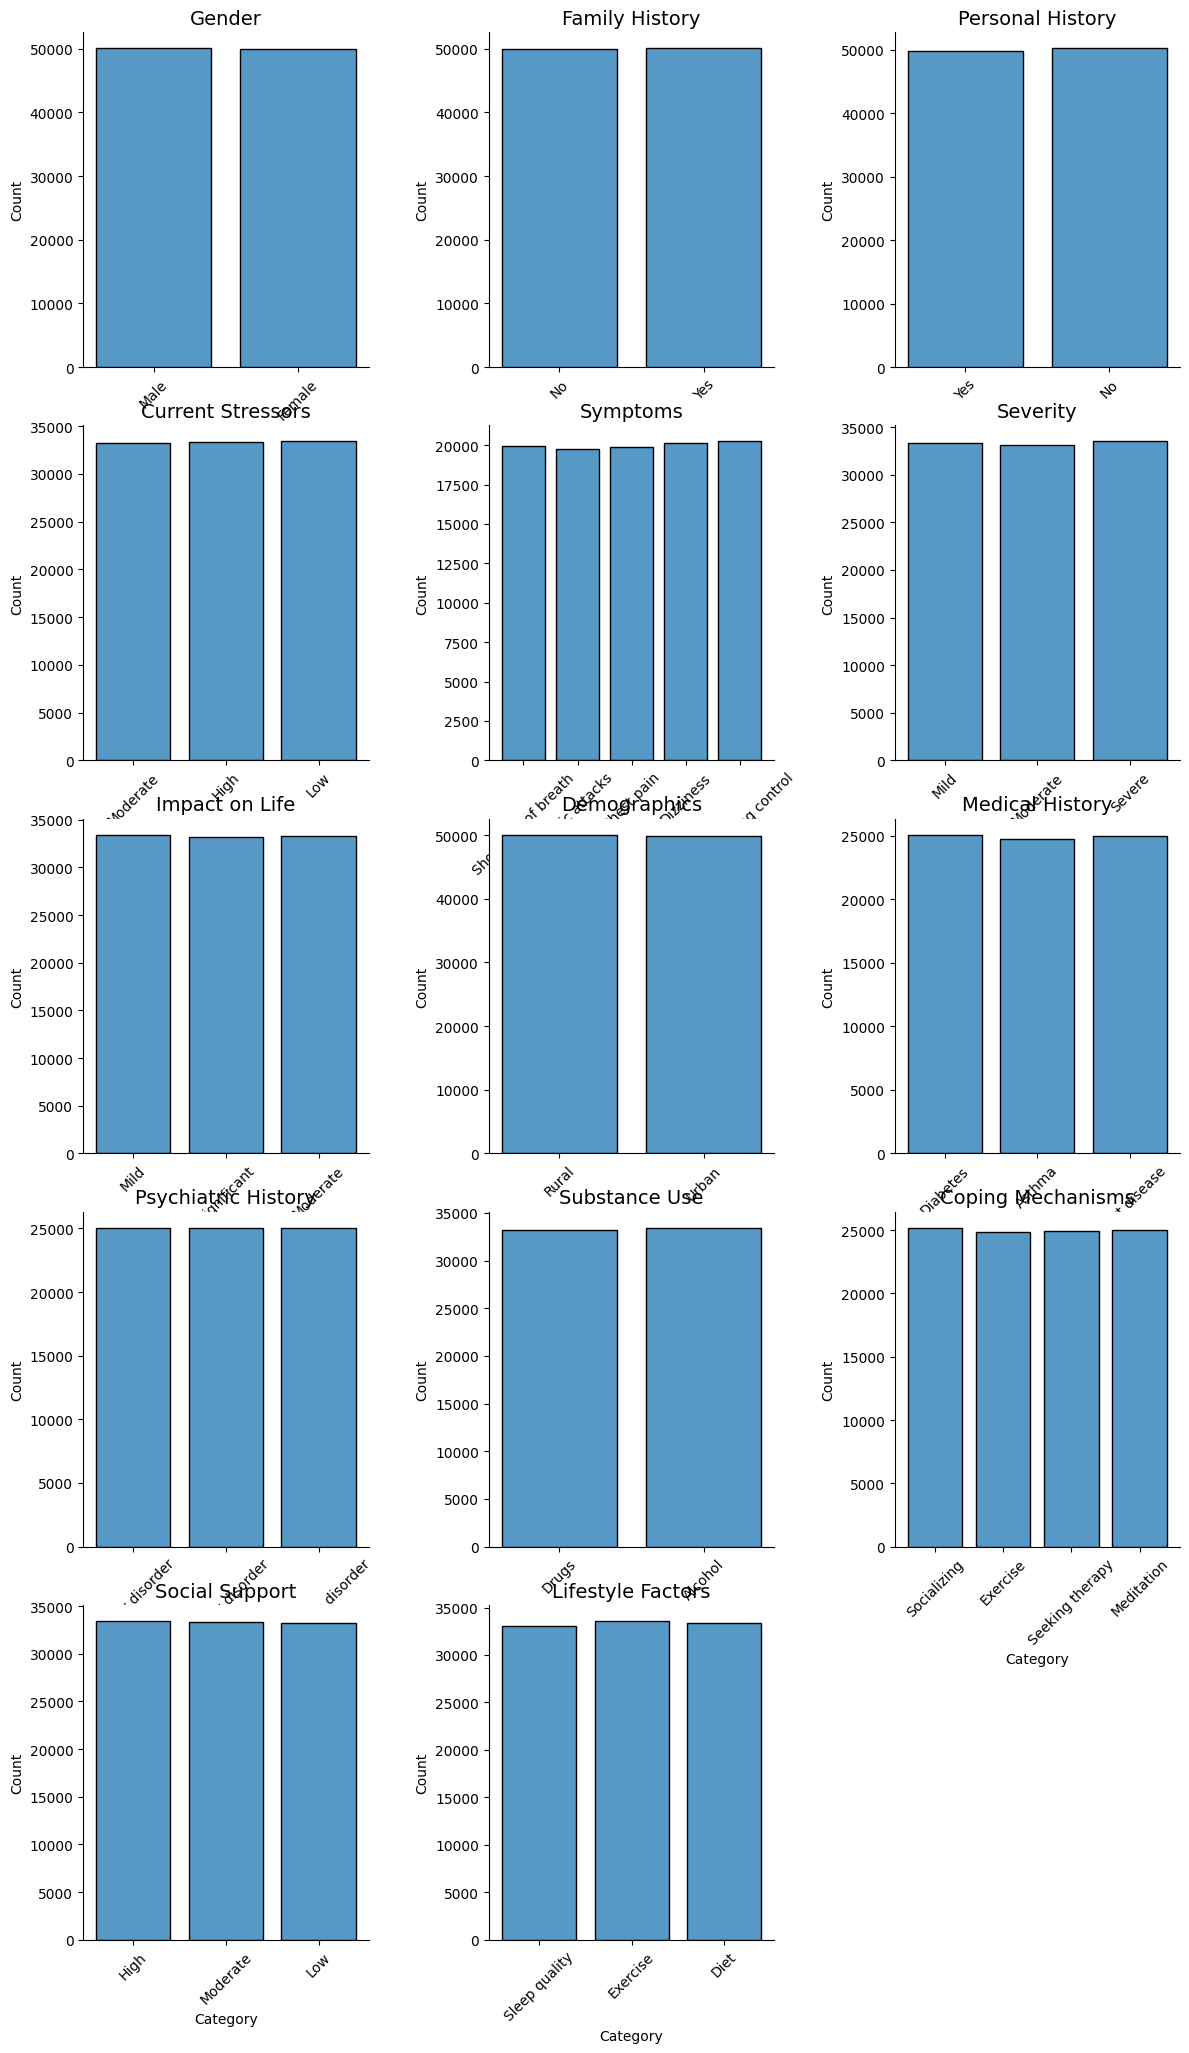

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting categorical features (excluding ID, Age, and Target column)
selected_columns = [col for col in train_df.columns if col not in ['Participant ID', 'Age', 'Panic Disorder Diagnosis']]
selected_df = train_df[selected_columns].melt(var_name="Feature", value_name="Category")

# FacetGrid for categorical feature distribution
g = sns.FacetGrid(selected_df, col="Feature", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "Category", discrete=True, shrink=0.8, palette="Paired")

# Adjust layout for better readability
g.set_xticklabels(rotation=45, fontsize=10)
g.set_titles(col_template="{col_name}", size=14)
plt.show()


# Data Preprocessing



*    **One hot encoding**



In [22]:
train_PPD = train_df["Panic Disorder Diagnosis"]
test_PPD = test_df["Panic Disorder Diagnosis"]

In [23]:
# one hot coding of train set
age_train = train_df.loc[:, "Age"].copy().reset_index(drop=True)
categorical_columns_train = train_df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical_encoded = encoder.fit_transform(train_df[categorical_columns_train])
X_train_encoded = pd.DataFrame(X_train_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_train))
X_train_preprocessed = pd.concat([X_train_encoded, age_train], axis=1)

X_train_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,38
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,51
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,64
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,31


In [24]:
# one hot coding of test set
age_test = test_df.loc[:, "Age"].copy().reset_index(drop=True)
categorical_columns_test = test_df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_test_categorical_encoded = encoder.fit_transform(test_df[categorical_columns_test])
X_test_encoded = pd.DataFrame(X_test_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns_test))
X_test_preprocessed = pd.concat([X_test_encoded, age_test], axis=1)

X_test_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,41
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36




*   **Standardization of Age column**




In [30]:
# Standardization of "Age" in the train set
scaler = StandardScaler()
X_train_preprocessed["Age"] = scaler.fit_transform(X_train_preprocessed["Age"].values.reshape(-1, 1))

X_train_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0,1,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,-0.249604
1,0,1,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.689761
2,1,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,-0.683157
3,1,0,1,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1.629126
4,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,-0.755416


In [27]:
# Standardization of "Age" in the test set
scaler = StandardScaler()
X_test_preprocessed["Age"] = scaler.fit_transform(X_test_preprocessed["Age"].values.reshape(-1, 1))

X_test_preprocessed.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.035230
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.547389
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683298
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.035230
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.395268


In [28]:
# Making columns which are one hot encoded to integer and adding "Panic Disorder Diagnosis" column
# Train set

age = X_train_preprocessed.loc[:, 'Age']
X_train_preprocessed = X_train_preprocessed.astype(dtype='int64')
X_train_preprocessed.drop('Age', axis = 1)
X_train_preprocessed['Age'] = age

X_train_preprocessed = X_train_preprocessed.reset_index(drop=True)
train_PPD = train_PPD.reset_index(drop=True)

ALL_train = pd.concat([X_train_preprocessed, train_PPD], axis=1)
ALL_train.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age,Panic Disorder Diagnosis
0,0,1,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,-0.249604,0
1,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0.689761,0
2,1,0,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0,-0.683157,0
3,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,1.629126,0
4,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,-0.755416,0


In [31]:
# Making columns which are one hot encoded to integer and adding "Panic Disorder Diagnosis" column
# Test set

age = X_test_preprocessed.loc[:, 'Age']
X_test_preprocessed = X_test_preprocessed.astype(dtype='int64')
X_test_preprocessed.drop('Age', axis = 1)
X_test_preprocessed['Age'] = age

X_test_preprocessed = X_test_preprocessed.reset_index(drop=True)
test_PPD = test_PPD.reset_index(drop=True)

ALL_test = pd.concat([X_test_preprocessed, test_PPD], axis=1)
ALL_test.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age,Panic Disorder Diagnosis
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,-0.035230,0
1,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,-1.547389,0
2,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,-0.683298,0
3,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,-0.035230,0
4,1,0,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,-0.395268,0




*   **Correlation Matrix**

Since the values are all smaller than the general standard, it is hard to find meaningful relationship in the following correlation matrix.



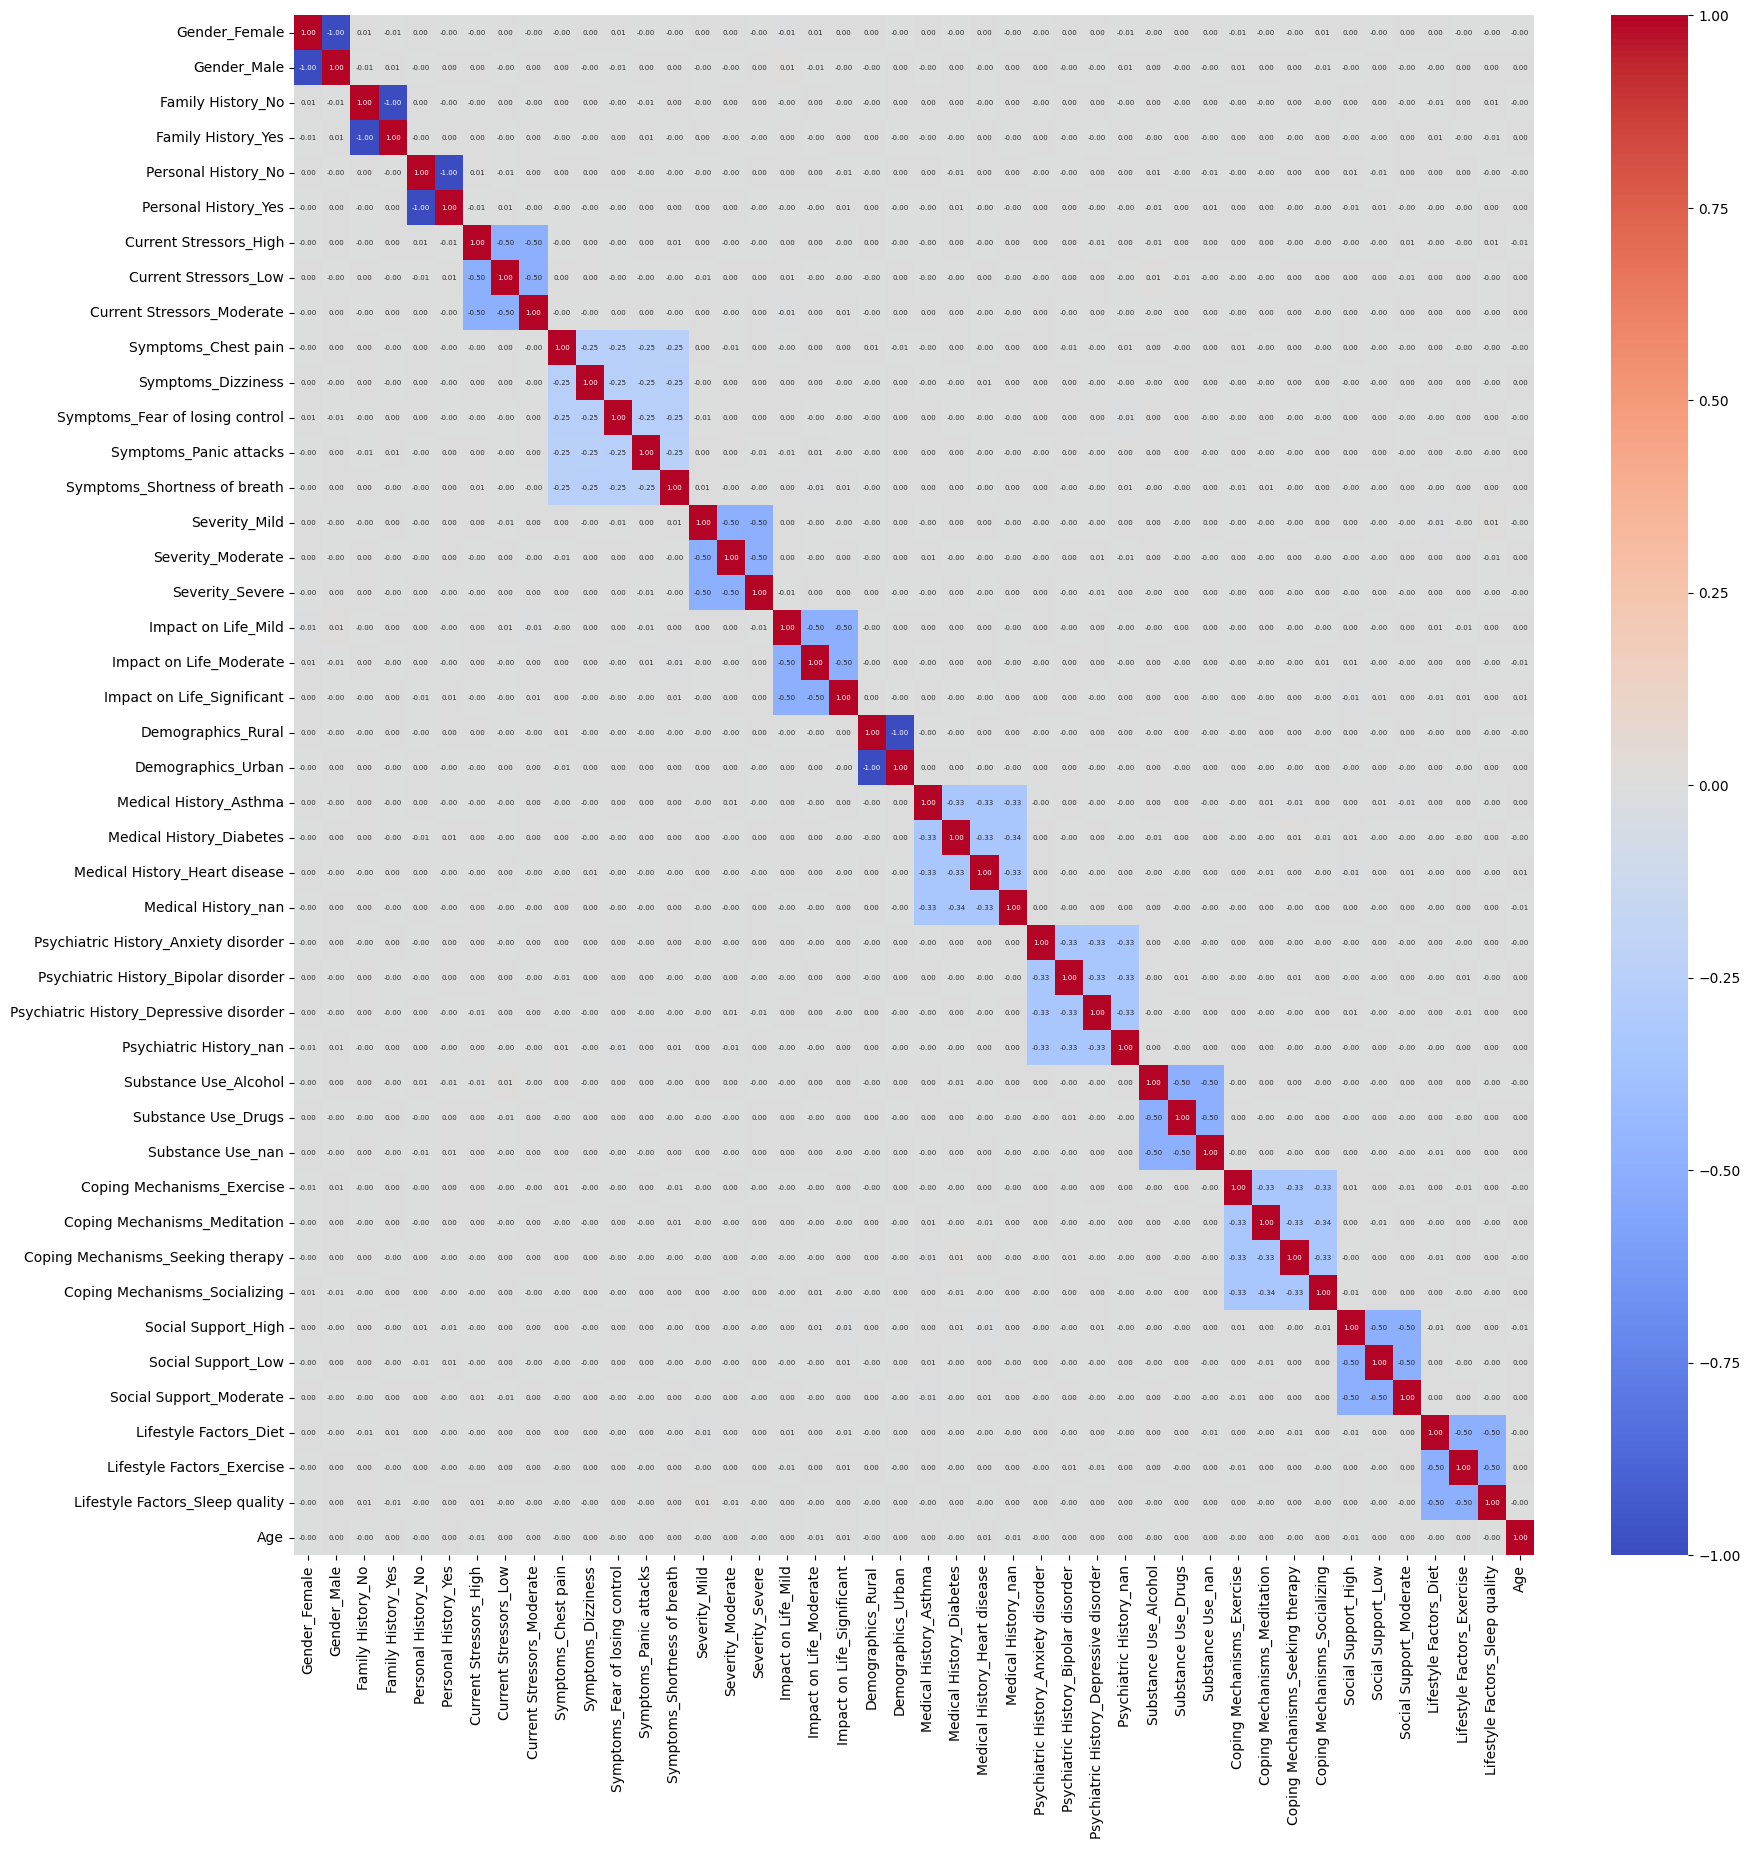

In [32]:
# Correlation matrix between all columns
plt.figure(figsize=(20, 20))
sns.heatmap(X_train_preprocessed.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 5})
plt.show()

## Cross Validating Models

In [36]:
# Spliting data set for Cross validation
target = "Panic Disorder Diagnosis"

X = X_train_preprocessed
Y = train_PPD

X_train, X_validation, Y_train, Y_validation = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42
)

X_test = X_test_preprocessed
Y_test = test_PPD

In [37]:
# Checking splitied data sets

print("Training size: ", X_train.shape[0])
print("Validation size: ", X_validation.shape[0])
print("Testing size: ", X_test.shape[0])

Training size:  70000
Validation size:  30000
Testing size:  20000


In [33]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

# Modeling step Test differents algorithms
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_preprocessed, y = train_PPD, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

Comparing accuracy of each model

<ipython-input-34-0a966b217a9e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g_left = sns.barplot(x='CrossValMeans', y='Algorithm', data=cv_res, orient='h', palette='Paired', ax=ax1)
<ipython-input-34-0a966b217a9e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g_right = sns.barplot(x='CrossValMeans', y='Algorithm', data=cv_res, orient='h', palette='Paired', ax=ax2)


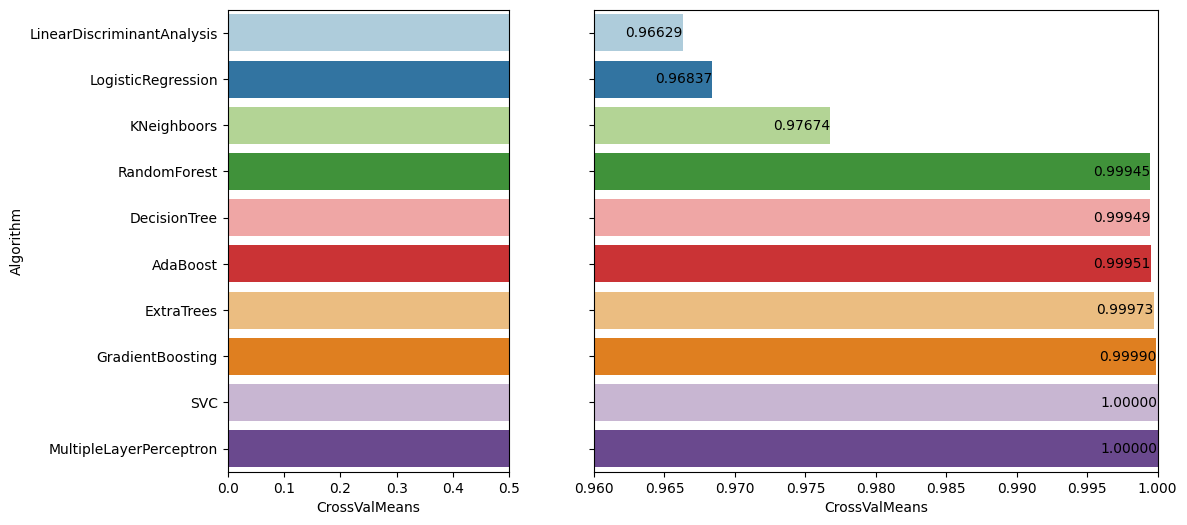

In [34]:
cv_res.sort_values('CrossValMeans', inplace=True)

# Create the horizontal bar plot with broken x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [20, 40]}, figsize=(12, 6))

# Bar plot for the left side of the break
g_left = sns.barplot(x='CrossValMeans', y='Algorithm', data=cv_res, orient='h', palette='Paired', ax=ax1)
ax1.set_xlim(0, 0.5)

# Bar plot for the right side of the break
g_right = sns.barplot(x='CrossValMeans', y='Algorithm', data=cv_res, orient='h', palette='Paired', ax=ax2)
ax2.set_xlim(0.96, 1)

# Add non-rounded numeric values on top of each bar
for index, value in enumerate(cv_res['CrossValMeans']):
    if value <= 20:
        ax1.text(value, index, f'{value:.5f}', color='black', ha="left", va='center', fontsize=10)
    else:
        ax2.text(value, index, f'{value:.5f}', color='black', ha="left", va='center', fontsize=10)

    # Add additional text labels on top of each bar (you can customize the format)
    ax1.text(value, index, f'{value:.5f}', color='black', ha="right", va='center', fontsize=10)
    ax2.text(value, index, f'{value:.5f}', color='black', ha="right", va='center', fontsize=10)

# Set label and tick font sizes
plt.rc('axes', labelsize=15)
plt.rc('ytick', labelsize=13)

# Show the plot
plt.show()

## 6.1. Training models

The top 5 models based on the accuracy graph above were trained by the train set and evaluated by the **validation set**.

#### **Top 5 Classifiers based on accuracy:**

1. Multiple Layer Perceptron

2. Support Vector Classifier (SVC)

3. GradientBoosting

4. ExtraTrees

5. AdaBoost

In [38]:
MLP_model = MLPClassifier()

MLP_model.fit(X_train, Y_train)

MLP_Y_pred = MLP_model.predict(X_validation)

MLP_accuracy = accuracy_score(Y_validation, MLP_Y_pred)
MLP_recall = recall_score(Y_validation, MLP_Y_pred)
MLP_f1 = f1_score(Y_validation, MLP_Y_pred)

In [39]:
SVC_model = SVC()

SVC_model.fit(X_train, Y_train)

SVC_Y_pred = SVC_model.predict(X_validation)

SVC_accuracy = accuracy_score(Y_validation, SVC_Y_pred)
SVC_recall = recall_score(Y_validation, SVC_Y_pred)
SVC_f1 = f1_score(Y_validation, SVC_Y_pred)

In [40]:
GBC_model = GradientBoostingClassifier()

GBC_model.fit(X_train, Y_train)

GBC_Y_pred = GBC_model.predict(X_validation)

GBC_accuracy = accuracy_score(Y_validation, GBC_Y_pred)
GBC_recall = recall_score(Y_validation, GBC_Y_pred)
GBC_f1 = f1_score(Y_validation, GBC_Y_pred)

In [41]:
ETC_model = ExtraTreesClassifier()

ETC_model.fit(X_train, Y_train)

ETC_Y_pred = ETC_model.predict(X_validation)

ETC_accuracy = accuracy_score(Y_validation, ETC_Y_pred)
ETC_recall = recall_score(Y_validation, ETC_Y_pred)
ETC_f1 = f1_score(Y_validation, ETC_Y_pred)

In [42]:
ABC_model = AdaBoostClassifier()

ABC_model.fit(X_train, Y_train)

ABC_Y_pred = ABC_model.predict(X_validation)

ABC_accuracy = accuracy_score(Y_validation, ETC_Y_pred)
ABC_recall = recall_score(Y_validation, ETC_Y_pred)
ABC_f1 = f1_score(Y_validation, ETC_Y_pred)

# Evaluating Models

Text(0.5, 1.0, 'Accuracy of Top 5 models')

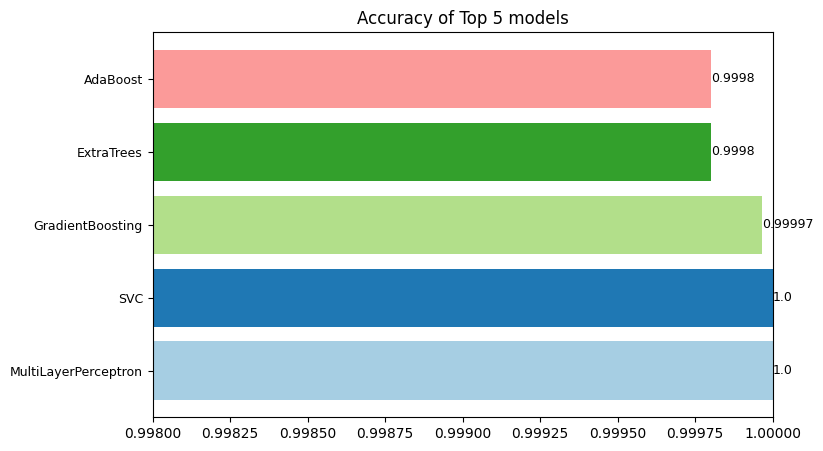

In [43]:
x = np.arange(5)
models = ['MultiLayerPerceptron', 'SVC', 'GradientBoosting', 'ExtraTrees', 'AdaBoost']
values = [MLP_accuracy, SVC_accuracy, GBC_accuracy, ETC_accuracy, ABC_accuracy]

colors = sns.color_palette("Paired", len(models))

plt.figure(figsize=(8, 5))

bars = plt.barh(x, values, color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(values[i], 5),
             va='center', ha='left', fontsize=9)

plt.yticks(x, models, fontsize=9)
plt.xlim(0.998, 1)
plt.title('Accuracy of Top 5 models')


Recall

<ipython-input-44-1051c14f70b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=recall_scores, y=models, palette='Paired')


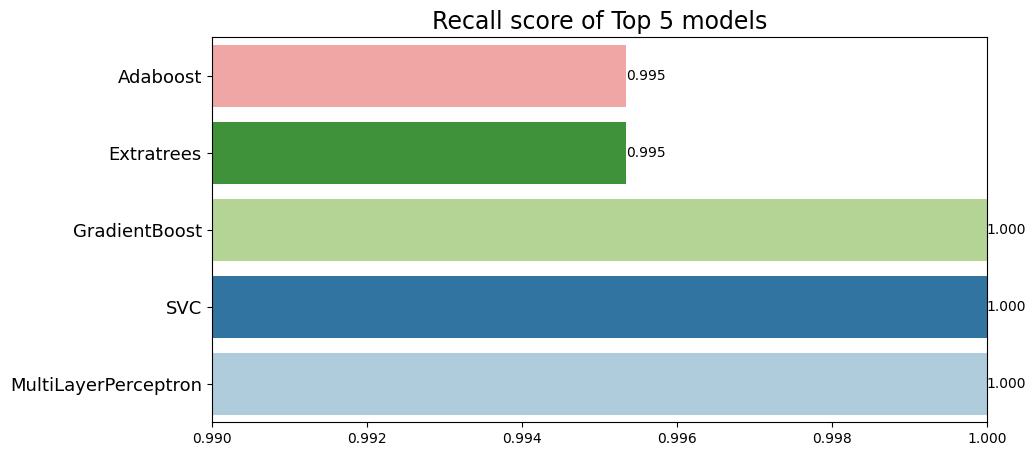

In [44]:
models = ['MultiLayerPerceptron', 'SVC', 'GradientBoost', 'Extratrees', 'Adaboost']
recall_scores = [MLP_recall, SVC_recall, GBC_recall, ETC_recall, ABC_recall]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=recall_scores, y=models, palette='Paired')

for i, value in enumerate(recall_scores):
    ax.text(value, i, f'{value:.3f}', ha='left', va='center')

plt.xlim(0.99, 1)
plt.title('Recall score of Top 5 models', fontsize=17)
plt.gca().invert_yaxis()
plt.show()

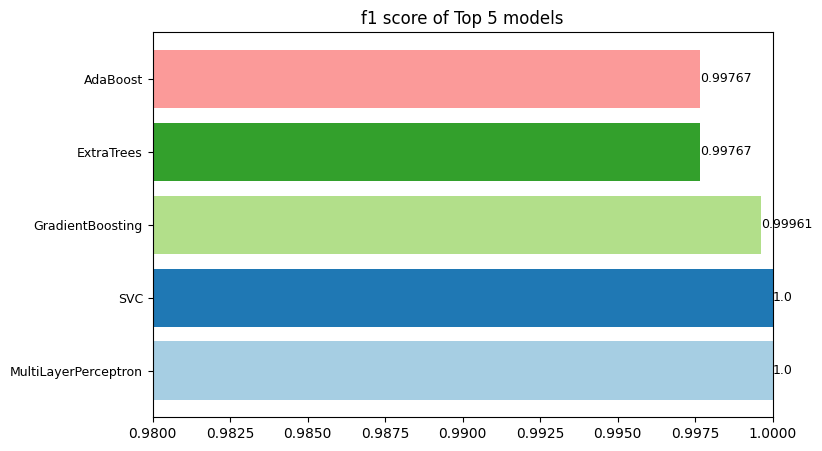

In [45]:
x = np.arange(5)
models = ['MultiLayerPerceptron', 'SVC', 'GradientBoosting', 'ExtraTrees', 'AdaBoost']
values = [MLP_f1, SVC_f1, GBC_f1, ETC_f1, ABC_f1]

# Defining colors
colors = sns.color_palette("Paired", len(models))

plt.figure(figsize=(8, 5))

bars = plt.barh(x, values, color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(values[i], 5),
             va='center', ha='left', fontsize=9)

plt.yticks(x, models, fontsize=9)
plt.xlim(0.98, 1)
plt.title('f1 score of Top 5 models')
plt.show()

Learning Curves

In [46]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

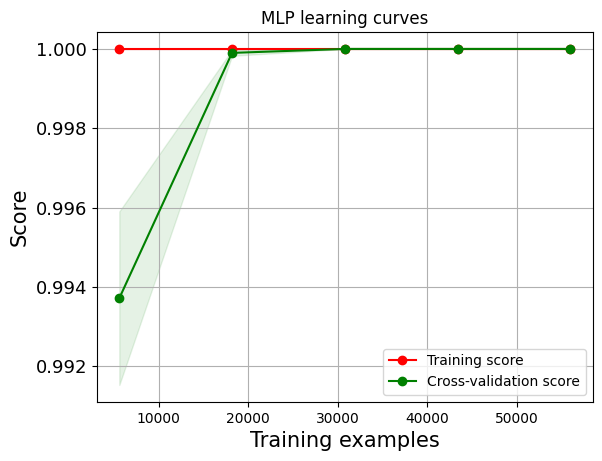

In [47]:
g = plot_learning_curve(MLP_model,"MLP learning curves", X_train, Y_train, cv=kfold)

KeyboardInterrupt: 

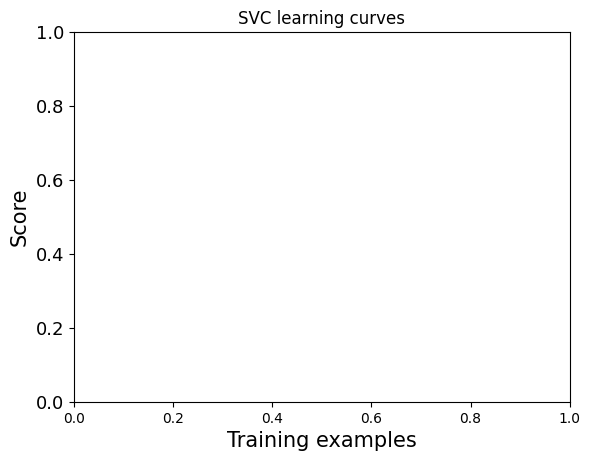

In [49]:
k_fold = StratifiedKFold(n_splits=5)
g = plot_learning_curve(SVC_model,"SVC learning curves", X_train, Y_train, cv=k_fold)

In [ ]:
g = plot_learning_curve(GBC_model,"GradientBoosting learning curves", X_train, Y_train, cv=kfold)

In [ ]:
g = plot_learning_curve(ETC_model,"ExtraTrees learning curves", X_train, Y_train, cv = kfold)

In [ ]:
g = plot_learning_curve(ABC_model,"AdaBoost learning curves", X_train, Y_train, cv = kfold)

# Combining Models

Among the Top 5 models, MLP(MultiLayerPerceptron classifier) and SVC(Support Vector Classifier), which consistently ranked first and second in accuracy, recall and f1 score, were selected to be ensembled.

In [ ]:
votingC = VotingClassifier(estimators=[('MLP', MLP_model), ('SVC', SVC_model)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [ ]:
votingC_train_pred = (MLP_Y_pred + SVC_Y_pred) / 2

votingC_train_accuracy = accuracy_score(Y_validation, votingC_train_pred)
votingC_train_recall = recall_score(Y_validation, votingC_train_pred)
votingC_train_f1 = f1_score(Y_validation, votingC_train_pred)

cm = confusion_matrix(Y_validation, votingC_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("[Model training scrores]")
print("Accuracy:", votingC_train_accuracy)
print("Recall:", votingC_train_recall)
print("f1 score", votingC_train_f1)

Confusion matrix test set

In [ ]:
MLP_test_pred = MLP_model.predict(X_test)
SVC_test_pred = SVC_model.predict(X_test)

In [ ]:
votingC_test_pred = (MLP_test_pred + SVC_test_pred) / 2

votingC_test_accuracy = accuracy_score(Y_test, votingC_test_pred)
votingC_test_recall = recall_score(Y_test, votingC_test_pred)
votingC_test_f1 = f1_score(Y_test, votingC_test_pred)

cm = confusion_matrix(Y_test, votingC_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("[Model testing scores]:")
print("Accuracy:", votingC_test_accuracy)
print("Recall:", votingC_test_recall)
print("F1 Score:", votingC_test_f1)

# SHAP

Since the performance of combined model is excessively perfect, it is desirable to focus on explaining the importance of each feature.

In [ ]:
pip install shap

In [ ]:
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data' with features and a target variable 'target'
# Replace this with your actual data
# X represents the features, y represents the target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train your XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Create a SHAP explainer specifically for XGBoost using TreeExplainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a subset of the test set
# Adjust 'num_rows' based on the size of your test set
shap_values = explainer.shap_values(X_train[:3000])  # Using a subset of 100 rows for illustration

# Visualize individual predictions with force_plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

# Summary

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_train[:3000])

In [ ]:
shap.summary_plot(shap_values, X_train[:3000], plot_type='bar')

* The **unnatural balance** of dataset suggests the possibility of its **artificial creation**.
* Through cross-validating models, it is found that **MLP**(MultiLayerPerceptron classifier) and **SVC**(Support Vector Classifier) have the highest accuracy, recall and f1 scores which are 1.0.
* The most important features are **sleep quality** from lifestyle factor column and the **high current stressor**.